In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, KMeansSMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
file_path = '../data/processed/Juegorawg_limpio.csv'
df = pd.read_csv(file_path)
df.copy()


,slug,name,playtime,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,suggestions_count,updated,reviews_count,release_year,main_genre,metacritic_category
0,hellpoint,Hellpoint,3,2020-07-30,2.76,3,51,2,2182,61.0,494,2024-11-26 14:58:37,54,2020,Indie,Media
1,anomaly-2,Anomaly 2,2,2013-05-14,2.90,4,62,0,1898,77.0,610,2024-10-07 11:59:32,62,2013,Strategy,Media
2,reverse-4,Resident Evil Re:Verse,1,2022-10-28,1.53,1,63,0,1662,78.0,456,2024-11-14 19:49:03,64,2022,Shooter,Media
3,x-morph-defense,X-Morph: Defense,3,2017-08-30,3.08,3,47,1,1657,75.0,702,2024-11-08 09:09:44,48,2017,Indie,Media
4,west-of-dead,West of Dead,1,2020-06-08,3.08,3,64,2,1634,68.0,456,2024-03-05 13:43:19,66,2020,Indie,Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,the-otterman-empire,The Otterman Empire,0,2020-07-02,0.00,0,0,0,0,76.5,333,2020-12-16 15:29:54,0,2020,Casual,Media
3764,jacks-or-better-video-poker,Jacks or Better - Video Poker,0,2020-06-12,0.00,0,0,0,0,76.5,0,2022-04-29 05:58:06,0,2020,Casual,Media
3765,jumanji-the-curse-returns,Jumanji: The Curse Returns,0,2021-09-01,0.00,0,0,0,0,76.0,251,2022-09-19 08:16:26,0,2021,Adventure,Media
3766,avocuddle,AvoCuddle,0,2019-07-12,0.00,0,0,0,0,73.0,400,2020-12-16 14:38:36,0,2019,Indie,Media


## Ml Serie temporales con la variable ' released'
-✅ Tiene una clara relación temporal: la cantidad de veces que un juego es agregado puede evolucionar con el tiempo.
- ✅ Puede mostrar tendencias en la industria del gaming (juegos más populares en ciertos períodos).
- ✅ Es más predecible en función de lanzamientos, eventos y cambios en el mercado.

In [14]:
df['released'] = pd.to_datetime(df['released'], errors='coerce')

### Las veces que agregue added por año de lanzamiento

In [15]:
df_time_series = df.groupby('release_year')['added'].sum().reset_index()

# Definir el indice de tiempo

In [16]:
df_time_series.set_index('release_year', inplace=True)

# Aplicar la descomposicion de serie temporal , en mi dataset lo tengo anual

In [20]:
decomposition = seasonal_decompose(df_time_series['added'], model='additive', period=1)

# Graficar los componentes 

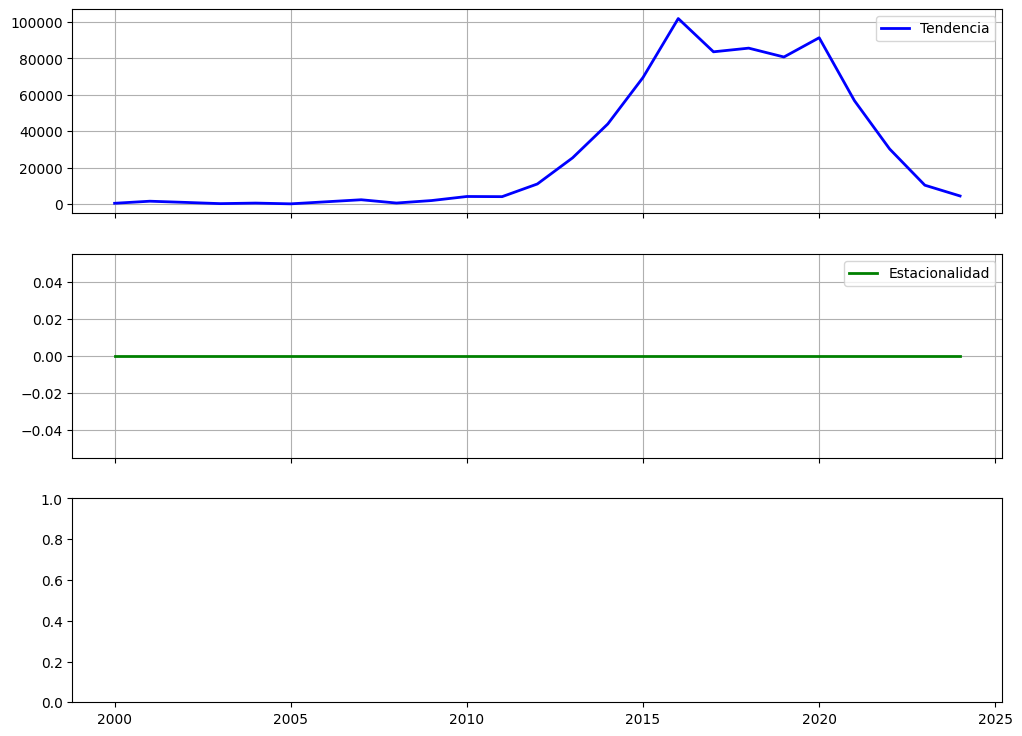

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

'''Tendencia'''
axes[0].plot(decomposition.trend, label="Tendencia", color="blue", linewidth=2)
axes[0].legend()
axes[0].grid(True)

''' Estacionalidad'''
axes[1].plot(decomposition.seasonal, label="Estacionalidad", color="green", linewidth=2)
axes[1].legend()
axes[1].grid(True)